# Process Bursts

This notebook computes the burst drift for all bursts using the method show in `BurstDrift.ipynb`

In [9]:
#!/usr/bin/python3

from __future__ import division
import math
import os
import sys
import time
import numpy as np
import scipy.stats
from scipy.optimize import curve_fit
from math import log10
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import pi as nombrepi
from scipy import signal, ndimage
from tqdm import tqdm
from matplotlib import colors as mcolors
import functools
print = functools.partial(print, flush=True) # print doesn't happen til script ends so force it to flush... windows thing?
import pandas as pd

bursts = pd.read_csv('bursts.csv')

In [25]:

for burst, filename, edge in zip(range(1, len(bursts['filename'])+1), bursts['filename'], bursts['edge']):
    print(burst, filename, edge)

1 01_puppi_57747_C0531+33_0558_5.dm559.72.calibP.RM.DD.ASCII 1525
2 02_puppi_57747_C0531+33_0558_1183.dm559.72.calibP.RM.DD.ASCII 1850
3 03_puppi_57747_C0531+33_0558_1202.dm559.72.calibP.RM.DD.ASCII 1975
4 04_puppi_57747_C0531+33_0558_25437.dm559.72.calibP.RM.DD.ASCII 1450
5 05_puppi_57747_C0531+33_0558_3683.dm559.72.calibP.RM.DD.ASCII 1450
6 06_puppi_57747_C0531+33_0558_3687.dm559.72.calibP.RM.DD.ASCII 1150
7 07_puppi_57747_C0531+33_0558_3688.dm559.72.calibP.RM.DD.ASCII 1590
8 08_puppi_57747_C0531+33_0558_3689.dm559.72.calibP.RM.DD.ASCII 2000
9 09_puppi_57747_C0531+33_0558_3690.dm559.72.calibP.RM.DD.ASCII 1600
10 10_puppi_57747_C0531+33_0558_12568.dm559.72.calibP.RM.DD.ASCII 800
11 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII 1800
12 12_puppi_57748_C0531+33_0594_48.dm559.72.calibP.RM.DD.ASCII 1000
13 13_puppi_57748_C0531+33_0594_49.dm559.72.calibP.RM.DD.ASCII 1900
14 14_puppi_57748_C0531+33_0594_50.dm559.72.calibP.RM.DD.ASCII 1550
15 15_puppi_57748_C0531+33_0594_1269.dm5

In [1]:
burst = 1
folder = 'data'
filename = '01_puppi_57747_C0531+33_0558_5.dm559.72.calibP.RM.DD.ASCII'

junk, nchan, nbin, I, Q, U, V = np.loadtxt('{}/{}'.format(folder, filename), delimiter=' ', unpack=True)
n = len(junk)
print("Data loaded")

Data loaded


In [2]:
binmax = int(nbin[n-1])+1
frequencymax = (int(nchan[n-1])+1)
print("dimensions:", binmax, frequencymax)
intensity = np.zeros((frequencymax, binmax))

X = np.zeros(binmax)
Y = np.zeros(frequencymax)

tmin = 500

tmax = 1500

intensitynoise1 = np.zeros(tmin-1)
intensitynoise2 = np.zeros(binmax-tmax)
for i in tqdm(range(frequencymax-50,51,-1), desc='noise removal'):

	Y[i-1] = 4.15 + (i-1) * 1.5625 # ?

	for j in range(1,tmin) :

		intensitynoise1[j-1] = (I[j-1 + binmax*(frequencymax-i)])/(tmin-1)


	for j in range(tmax+1,binmax+1) :

		intensitynoise2[j-1-tmax] = (I[j-1 + binmax*(frequencymax-i)])/(binmax-tmax)

	a = sum(intensitynoise1)
	b = sum(intensitynoise2)

	for j in range(1,binmax+1) :
		X[j-1] = j-1
		intensity[i-1,j-1] = I[j-1 + binmax*(frequencymax-i)] - (a+b)/2

# del intensitynoise1
# del intensitynoise2
# del junk, nchan, nbin, I, Q, U, V

dimensions: 4096 512


noise removal: 100%|██████████| 411/411 [00:05<00:00, 76.27it/s]


(512, 512)


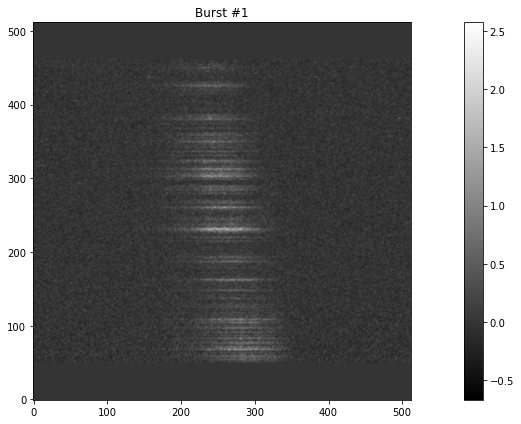

In [8]:
edge = 1525
burstwindow = intensity[:,edge:edge+frequencymax]

cmap = "gray"
plt.figure(figsize=(15,6))
# plt.subplot(121)
plt.title("Burst #{}".format(burst))

# plt.imshow(intensity, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower")
plt.imshow(burstwindow, cmap=cmap, interpolation='bicubic',aspect='equal', origin="lower")

plt.colorbar()
# plt.subplot(122)
# plt.imshow(corr, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower")
# plt.title("Correlation #{}".format(burst))
# plt.colorbar()
plt.tight_layout()
print(burstwindow.shape)